# Random_Forest_Bagging

# Concept Session

# Ensemble Learning

Ensemble learning is a widely-used and preferred machine learning technique in which multiple individual models, often called base models, is combined to produce an effective optimal prediction model. 

The **Random Forest algorithm** is an example of **ensemble learning**.

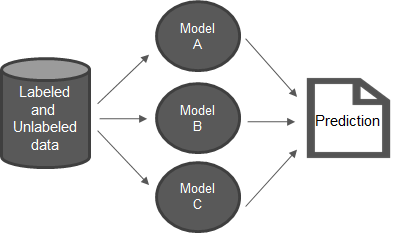

## What is Ensemble?

The ensemble methods in machine learning combine the insights obtained from multiple learning models to facilitate accurate and improved decisions. 

In learning models, noise, variance, and bias are the major sources of error. The ensemble methods in machine learning help minimize these error-causing factors, thereby ensuring the accuracy and stability of machine learning (ML) algorithms.

Learning the base models can either be:
    
    Parallel (Bagging)
    Or
    Sequential (Boosting)

The resulting ensemble model is expected to be more accurate, robust, and have less bias and/or variance.

Ensemble methods can be used for regression or classification problems.

## Weak and Strong Learners

## Weak Learners

Ensemble methods combine multiple base models to get better results.
Those base models have a weak performance and are often called weak learners.

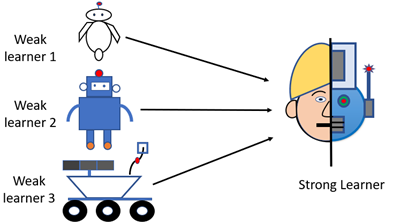

## Strong Learner

Combining multiple base models can often produce a more powerful model, also called a strong learner.

## What is Bagging?

**Motivation:->** How can we make a good prediction when multiple machine learning models of the same type are unstable and have a high variance?

Bagging, also known as Bootstrap aggregating, is an ensemble learning technique that helps to improve the performance and accuracy of machine learning algorithms. 

It is used to deal with bias-variance trade-offs and reduces the variance of a prediction model. Bagging avoids overfitting of data and is used for both regression and classification models, specifically for decision tree algorithms. 

Bagging Algorithm has three main steps: **Bootstrapping, Parallel Training, and Aggregation** 

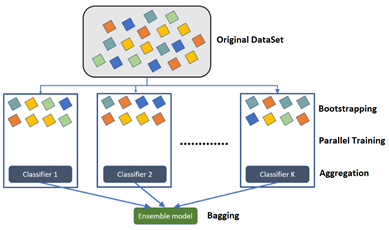

## 1. Bootstrapping:

- Bootstrapping is a statistical technique of generating samples, called bootstrap samples.
- Samples of size B are drawn with replacement from an initial dataset of size N.

<div>
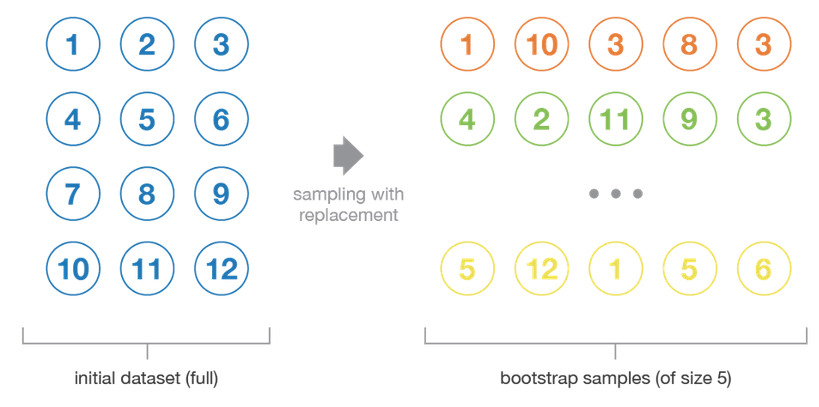
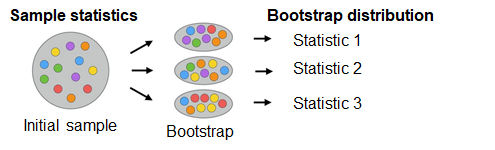
</div>

## Parallel Training

These bootstrap samples are then trained independently and in parallel with each other using weak or base learners.

## Bagging – Aggregation

There are several ways to aggregate the base models and obtain the ensemble methods output:

- **For a regression problem**, the base models' outputs can be averaged.
- **For a classification problem**, the output class from each base model can be seen as a vote. The ensemble model output is:
       
       The class that receives the majority vote (hard-voting).
       The class with the highest average probability (soft-voting).


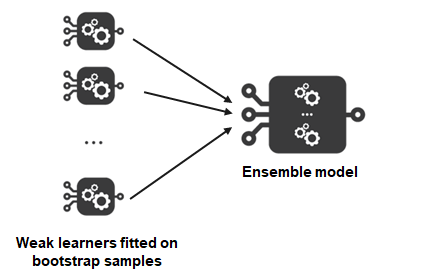

## Demo - 6.1: Bagging with Random Forest

#### We will use the Ensemble method: Bagging with Random Forest. To compare the results, we will also evaluate a simple Decision Tree.

In [1]:
# general imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std

import warnings
warnings.filterwarnings("ignore")

In [2]:
# data imports
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder

In [1]:
# evaluation imports
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

### Load the Data

We use the UCI breast cancer dataset to classify tumors as being malignant or benign. 

We use the scikit-learn API to import the dataset into our program.

In [4]:
help('sklearn.datasets')

Help on package sklearn.datasets in sklearn:

NAME
    sklearn.datasets

DESCRIPTION
    The :mod:`sklearn.datasets` module includes utilities to load datasets,
    including methods to load and fetch popular reference datasets. It also
    features some artificial data generators.

PACKAGE CONTENTS
    _base
    _california_housing
    _covtype
    _kddcup99
    _lfw
    _olivetti_faces
    _openml
    _rcv1
    _samples_generator
    _species_distributions
    _svmlight_format_fast
    _svmlight_format_io
    _twenty_newsgroups
    data (package)
    descr (package)
    images (package)
    setup
    tests (package)

FUNCTIONS
    clear_data_home(data_home=None)
        Delete all the content of the data home cache.
        
        Parameters
        ----------
        data_home : str, default=None
            The path to scikit-learn data directory. If `None`, the default path
            is `~/sklearn_learn_data`.
    
    dump_svmlight_file(X, y, f, *, zero_based=True, comment=No

In [5]:
# load data
breast_cancer = load_breast_cancer()

X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)

In [6]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y

['malignant', 'malignant', 'malignant', 'malignant', 'malignant', ..., 'malignant', 'malignant', 'malignant', 'malignant', 'benign']
Length: 569
Categories (2, object): ['malignant', 'benign']

## Label Encoding

#### Since the label is categorical, it must be encoded as numbers. As the result, malignant is set to 1 and benign to 0.

In [8]:
X.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [9]:
binary_encoded_y=pd.Series(LabelEncoder().fit_transform(y))

In [10]:
binary_encoded_y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int32

## Learn Ensembles

We will evaluate all models using **repeated stratified k-fold cross-validation**, with three repeats and 10 folds. 

We will report the mean and standard deviation of the F1-Score of the model across all repeats and folds.

## Baseline: Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
 # define the model
model = DecisionTreeClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, binary_encoded_y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')

print(n_scores)
# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


[0.85714286 0.9047619  0.9        0.9047619  0.9047619  0.92682927
 0.93333333 0.88372093 0.79069767 0.97674419 0.86363636 0.95454545
 0.8        0.93023256 0.92682927 0.93023256 0.92682927 0.90909091
 0.9047619  0.95454545 0.93333333 0.90909091 0.86363636 0.93023256
 0.88372093 0.9047619  0.93023256 0.87804878 0.90909091 0.95238095]
F1-Score: 0.906 (0.041)


#### Conclusion

We can see the decison tree with default parameters has 89.8% F1-Score.

Let's try Bagging with Random Forest.

## Bagging with Random Forest chekcing f1 scores using cvs

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
# define the model .default it takes 100 models
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, binary_encoded_y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print(n_scores)
print('F1-Score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


[0.93333333 0.93333333 0.97560976 0.97560976 0.88372093 0.92682927
 1.         0.92307692 0.92307692 0.92682927 0.93023256 0.95454545
 0.92682927 0.8372093  0.95238095 0.97560976 0.95       0.95238095
 1.         1.         0.95652174 0.97674419 0.86363636 0.95238095
 0.92307692 0.92307692 0.97674419 0.95       0.97674419 0.95      ]
F1-Score: 0.944 (0.037)


### Conclusion

For this dataset, we can see that the Ensemble method Bagging with default hyperparameters achieves a higher classification F1-Score than a simple Decision Tree Classifier.

## Using Hyperparameters - Random Forest

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape


((398, 30), (171, 30))

In [16]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
#here bootstrap is True by default
#n jobs means no of processor to run the job .-1 means all

In [17]:
%%time
classifier_rf.fit(X_train, y_train)


CPU times: total: 234 ms
Wall time: 644 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

Out of bag (OOB) score is a way of validating the Random forest model.

In [18]:
# checking the oob score
classifier_rf.oob_score_


0.957286432160804

## Hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

In [32]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)


In [33]:
params = {
 'max_depth': [2,3,5,10,20],
 'min_samples_leaf': [5,10,20,50,100,200],
 'n_estimators': [10,25,30,50,100,200]
}


##### Grid Search is an exhaustive search on a manually specified hyperparameter search region.

1. Select hyperparameters to optimize.

2. Select values to try out.

3. For each combination of the hyperparameter, build and test the model.

4. Choose the hyperparameter combination with the best performance.

In [35]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [36]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=3, scoring="accuracy")

#### scoring -  Strategy to evaluate the performance of the cross-validated model on the test set.

#### verbose - Controls the verbosity: the higher, the more messages.

 greater than 1 value : the computation time for each fold and parameter candidate is displayed;

 greater than 2 value : the score is also displayed;

 greater than 3 value : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.

In [37]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: total: 2.31 s
Wall time: 50.2 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=3)

In [38]:
grid_search.best_score_

0.9498232323232323

In [39]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

In [46]:
y_pred_rf1 = pd.DataFrame( { "actual": y_test, "predicted_prob": grid_search.predict( ( X_test ) ) } ) 
y_pred_rf1

,actual,predicted_prob
204,0,0
70,1,1
131,1,1
431,0,0
540,0,0
...,...,...
69,0,0
542,0,0
176,0,0
501,1,1


### Visualization

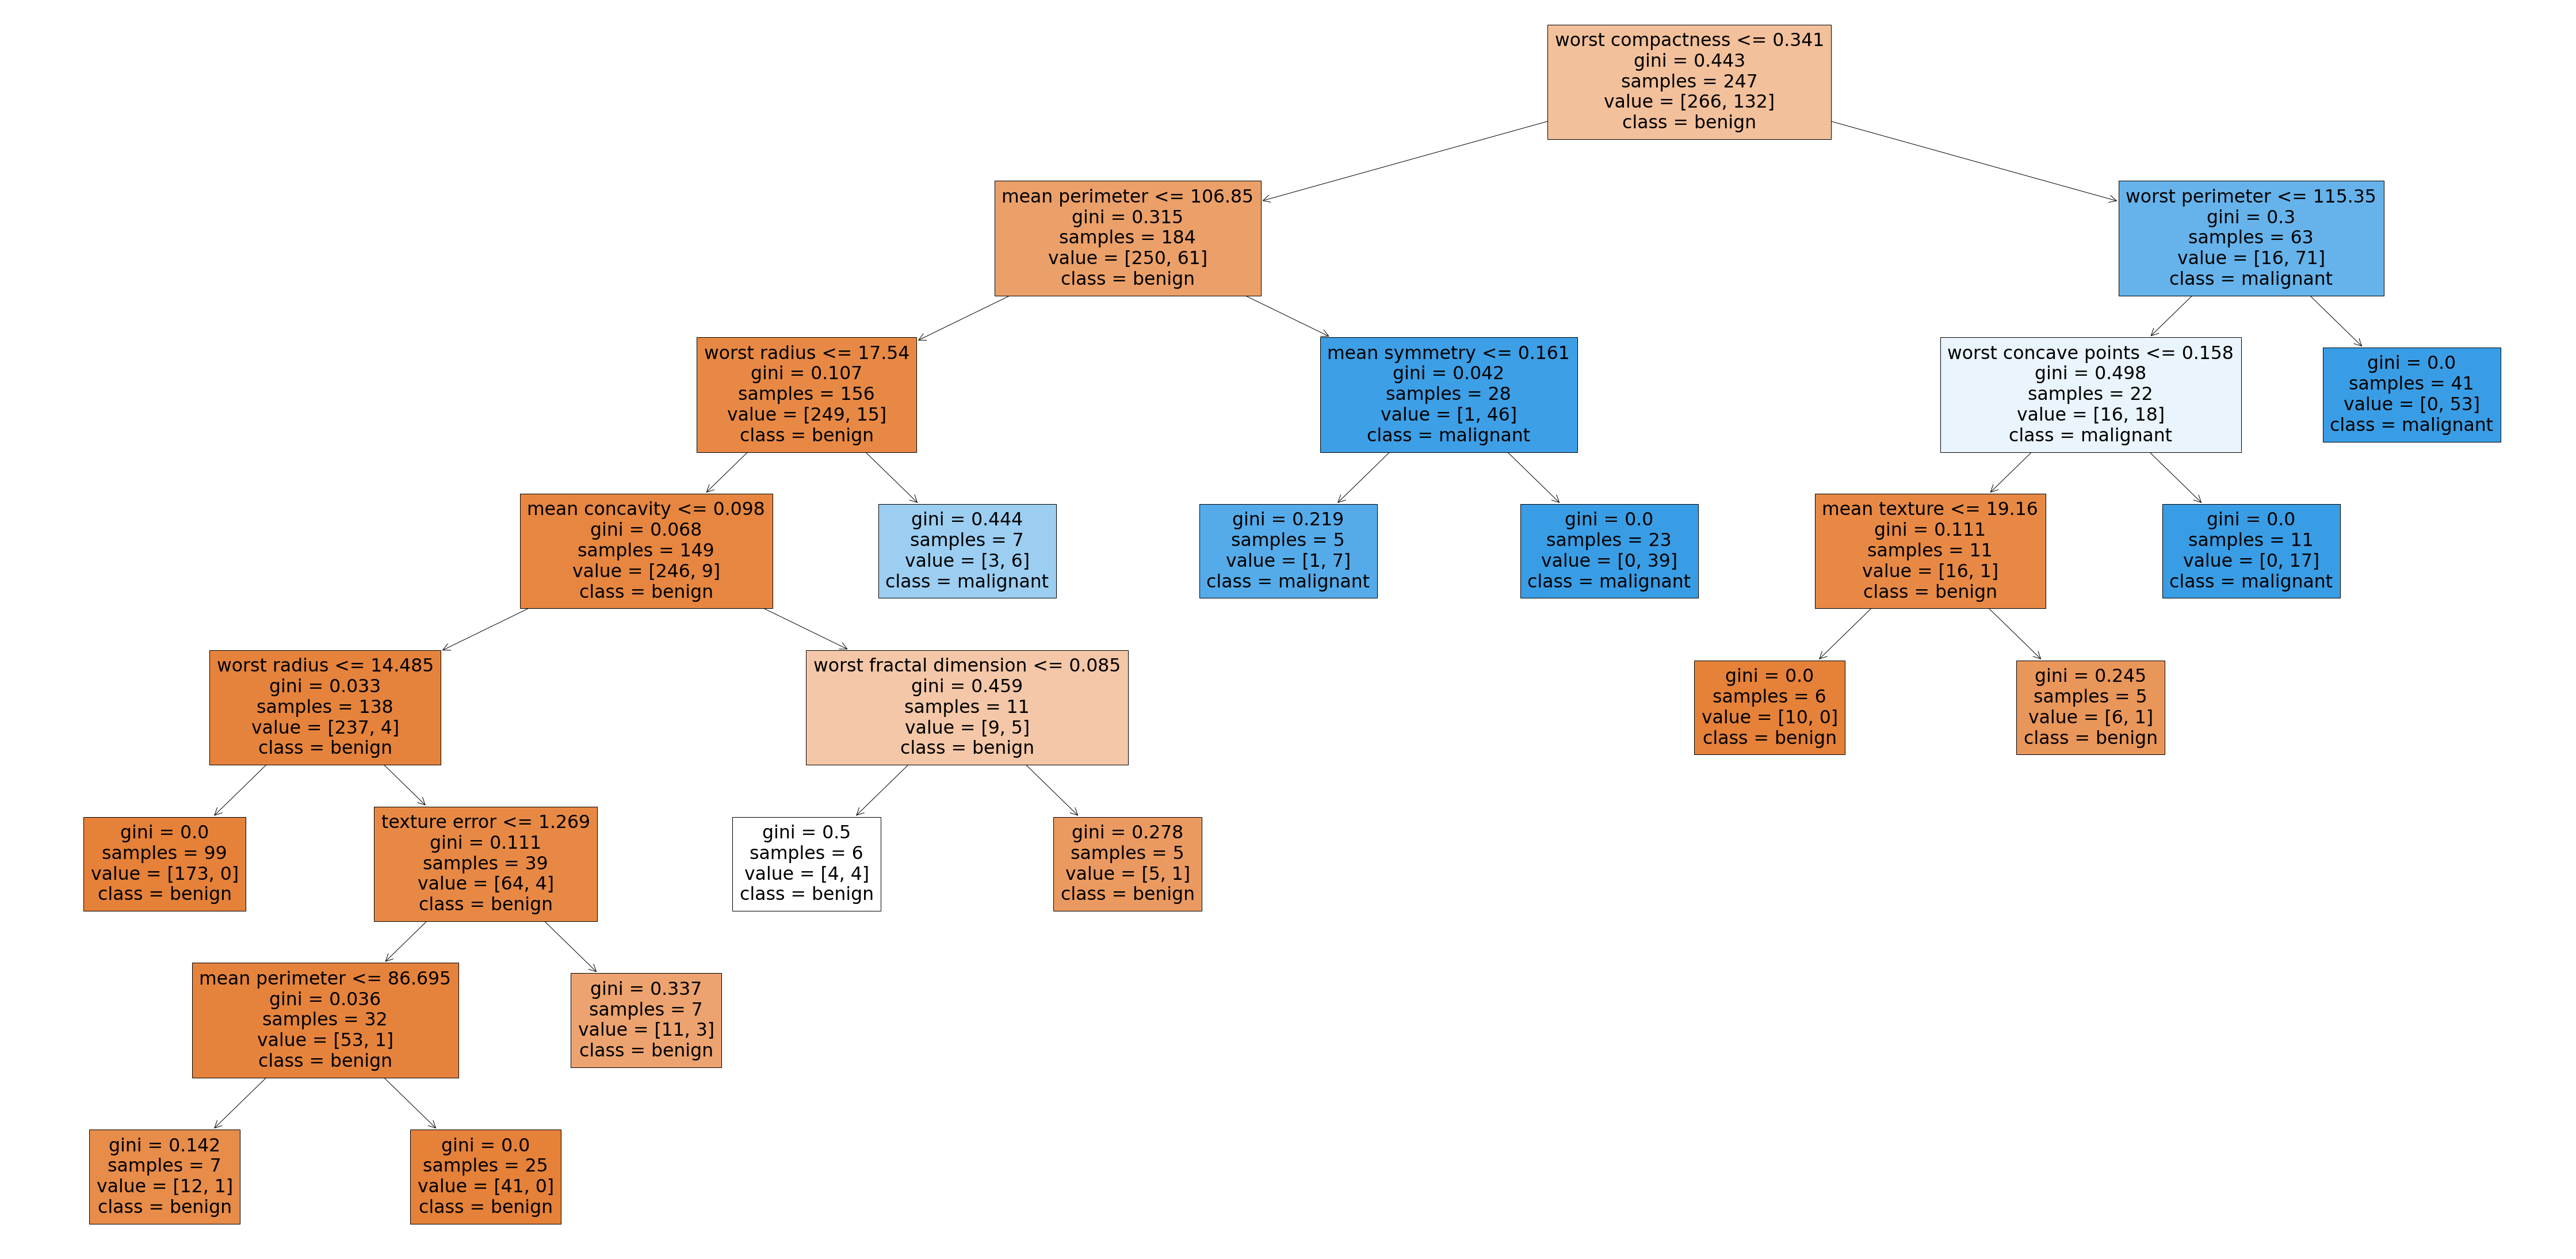

In [40]:
from sklearn.tree import plot_tree
model = RandomForestClassifier()
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['benign', "malignant"],filled=True);

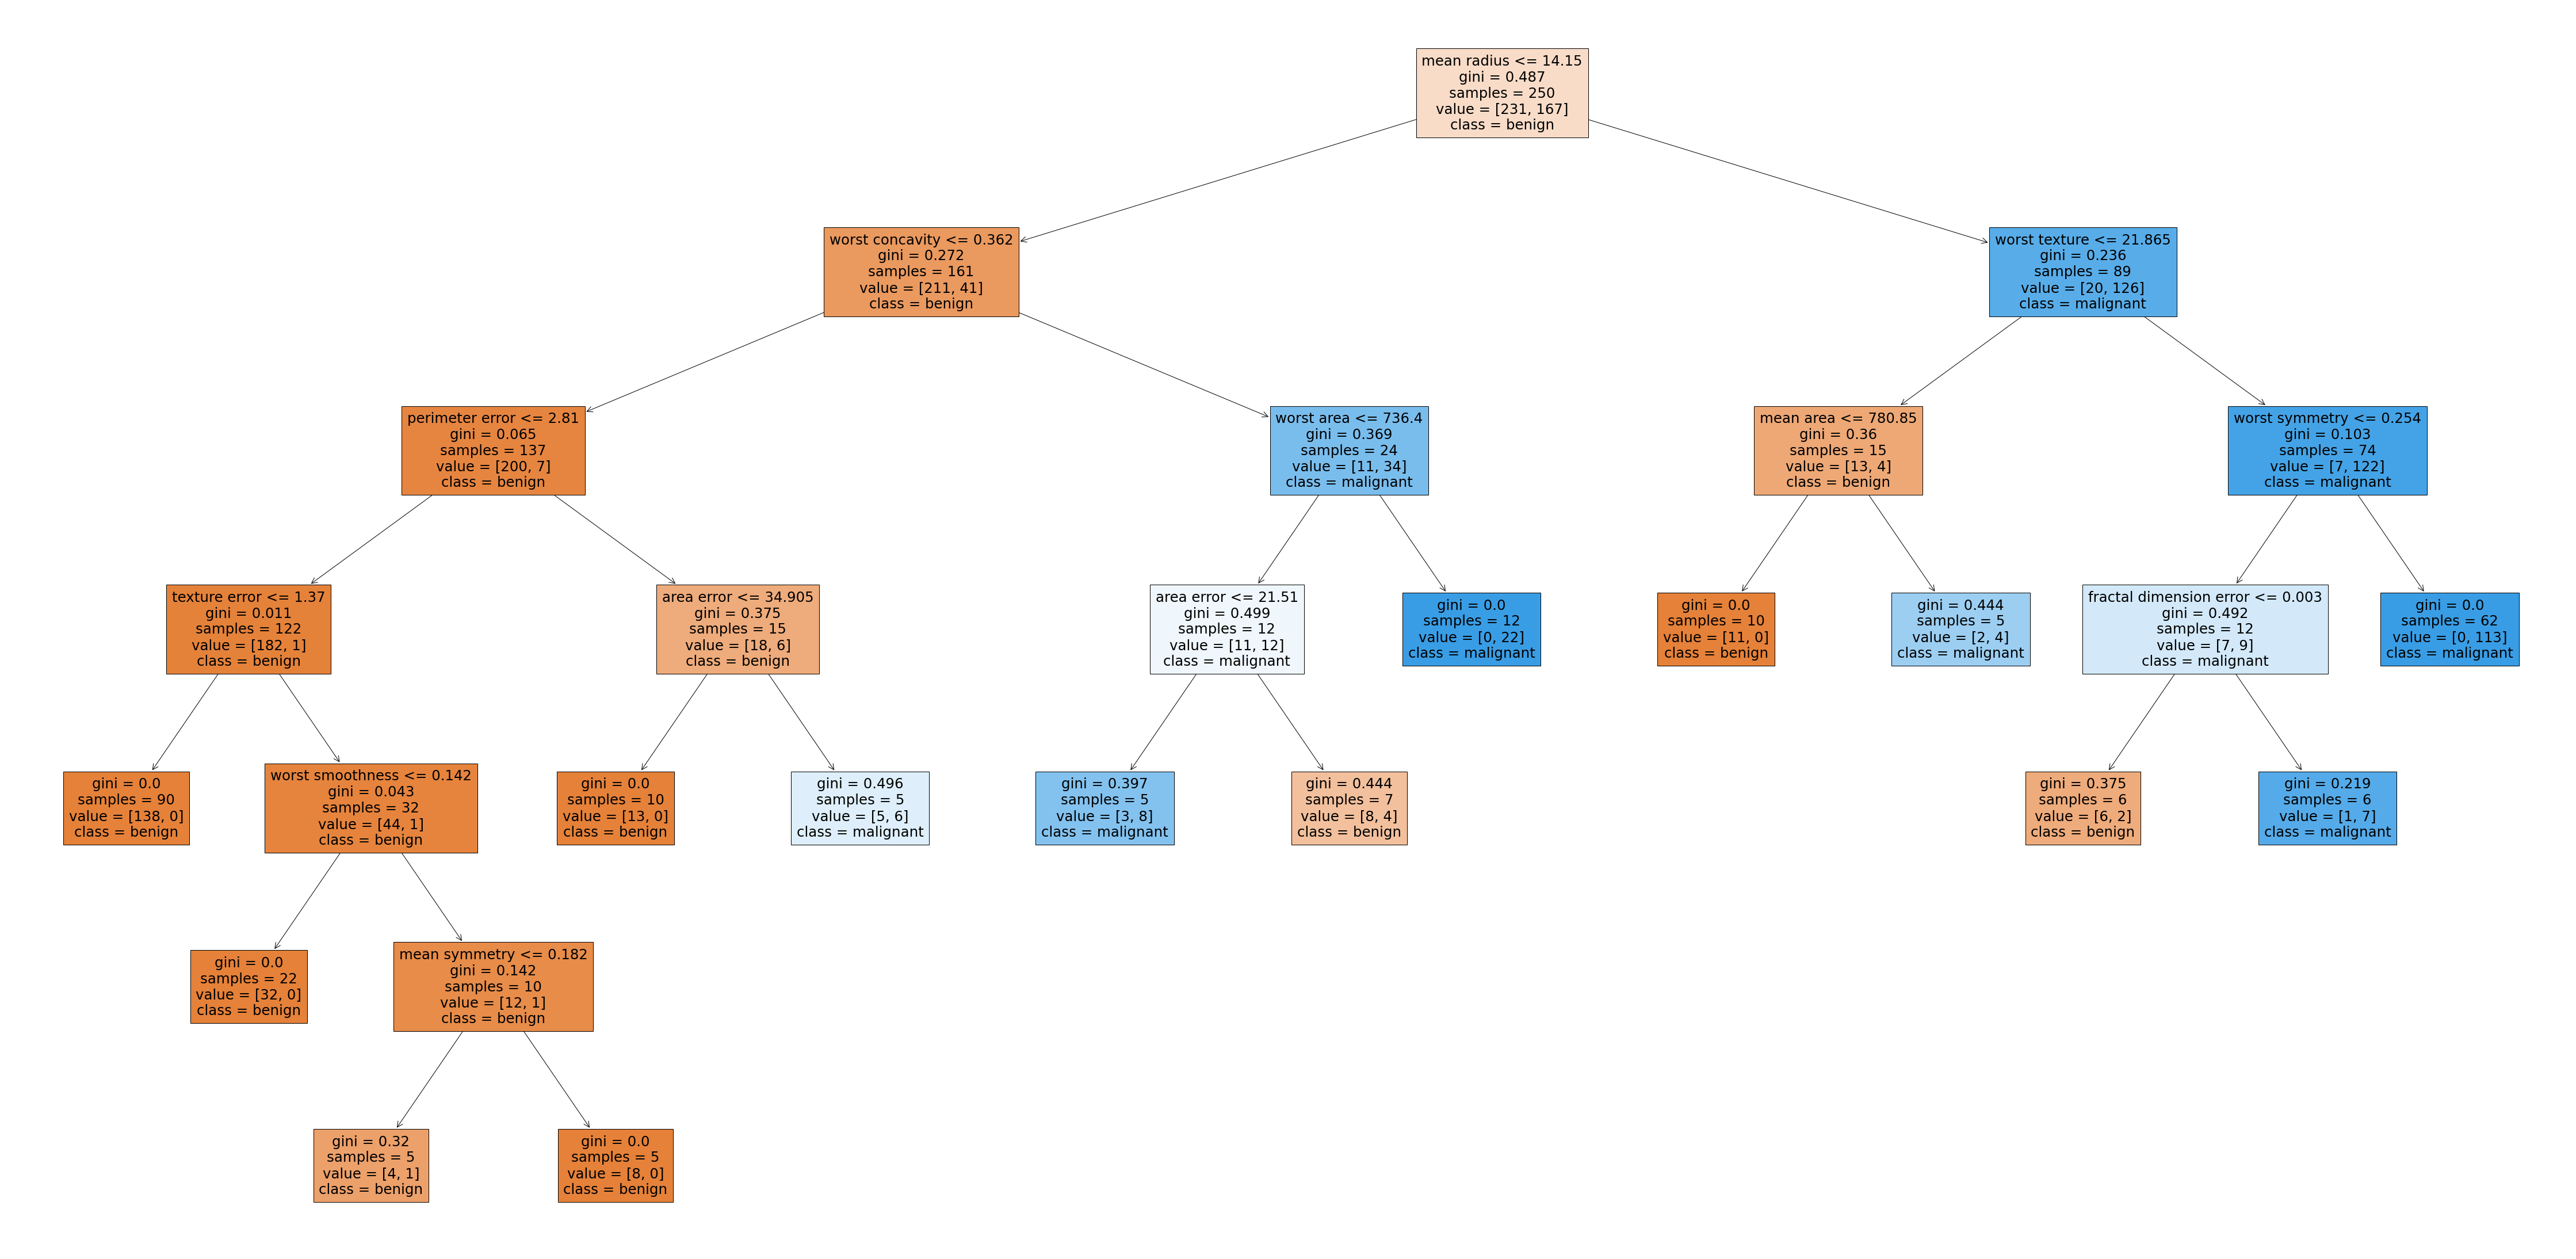

In [41]:
from sklearn.tree import plot_tree
model = RandomForestClassifier()
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['benign', "malignant"],filled=True);

The trees created by estimators_[5] and estimators_[7] are different. Thus we can say that each tree is independent of the other.

### Sort the data with the help of feature importance

In [42]:
rf_best.feature_importances_

array([0.05383061, 0.01032863, 0.10729129, 0.02385672, 0.00215312,
       0.        , 0.00269961, 0.10188862, 0.00027741, 0.00316153,
       0.01163739, 0.00068268, 0.00151174, 0.0699136 , 0.00438042,
       0.        , 0.00426131, 0.00283857, 0.00261453, 0.00335387,
       0.11229261, 0.01632565, 0.02229379, 0.09110058, 0.0053648 ,
       0.03611814, 0.09086192, 0.20931024, 0.00694288, 0.00270776])

In [43]:
imp_df = pd.DataFrame({
 "Varname": X_train.columns,
 "Imp": rf_best.feature_importances_
})


In [45]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
27,worst concave points,0.209310
20,worst radius,0.112293
2,mean perimeter,0.107291
7,mean concave points,0.101889
23,worst area,0.091101
26,worst concavity,0.090862
13,area error,0.069914
0,mean radius,0.053831
25,worst compactness,0.036118
3,mean area,0.023857
